## Custom datasets with PyTorch.

I have got my own dataset, I want to build a model with pytorch to predict on it.

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 19h48m07s].png](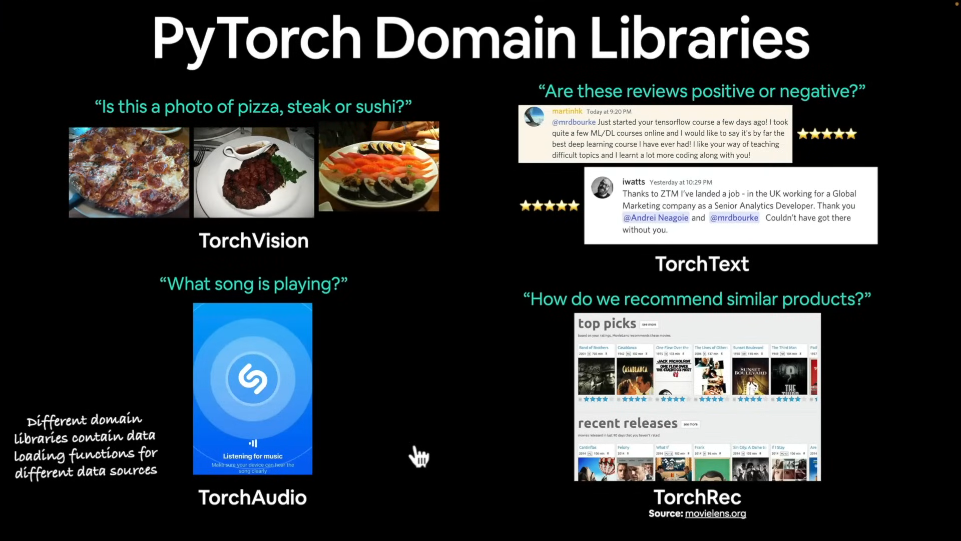)

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 19h49m27s].png](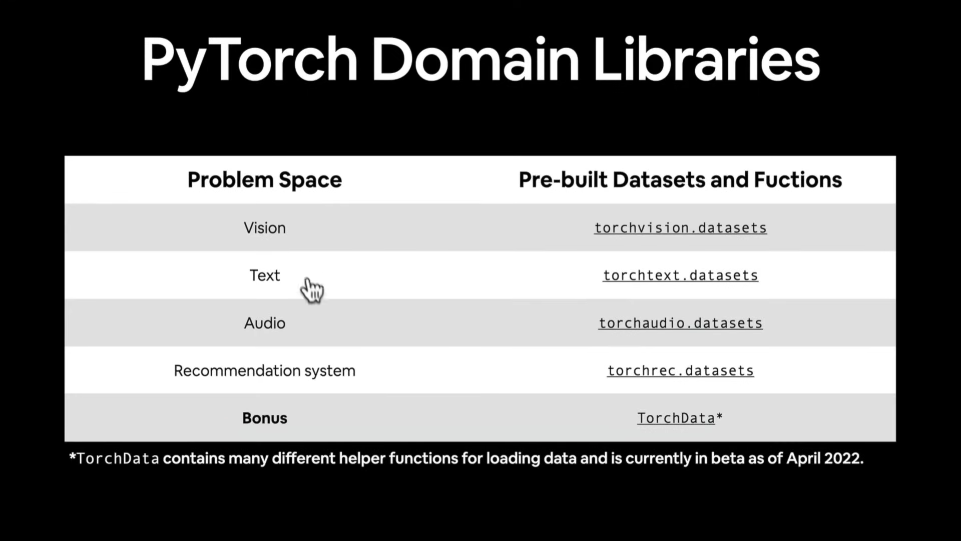)

What we are going to build :

**Food Image classification App** : FoodVision Mini model



![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 19h51m31s].png](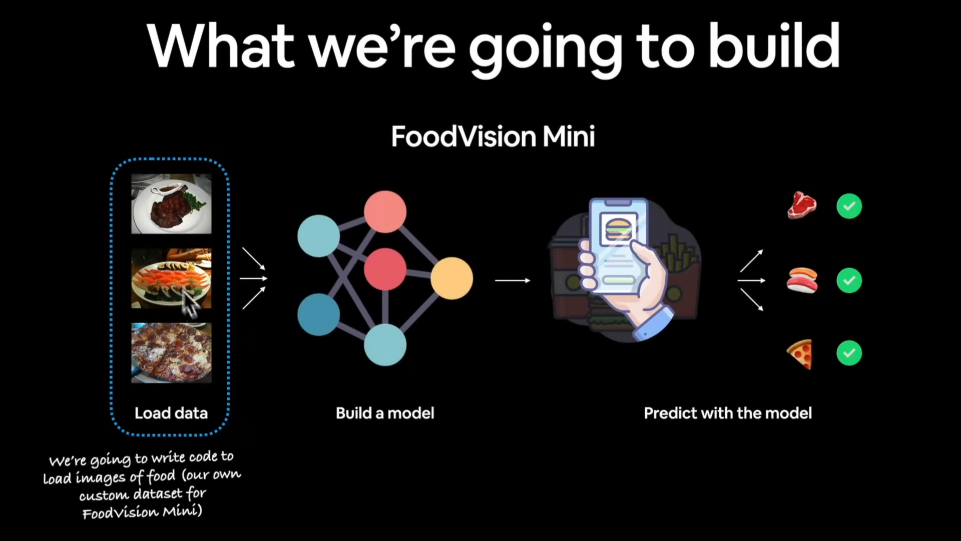)

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 19h52m24s].png](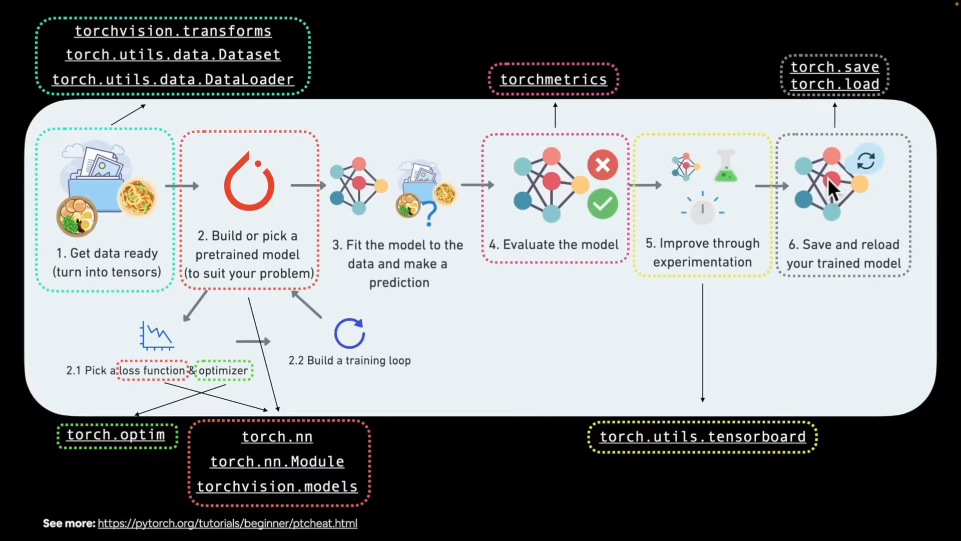)

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 19h53m18s].png](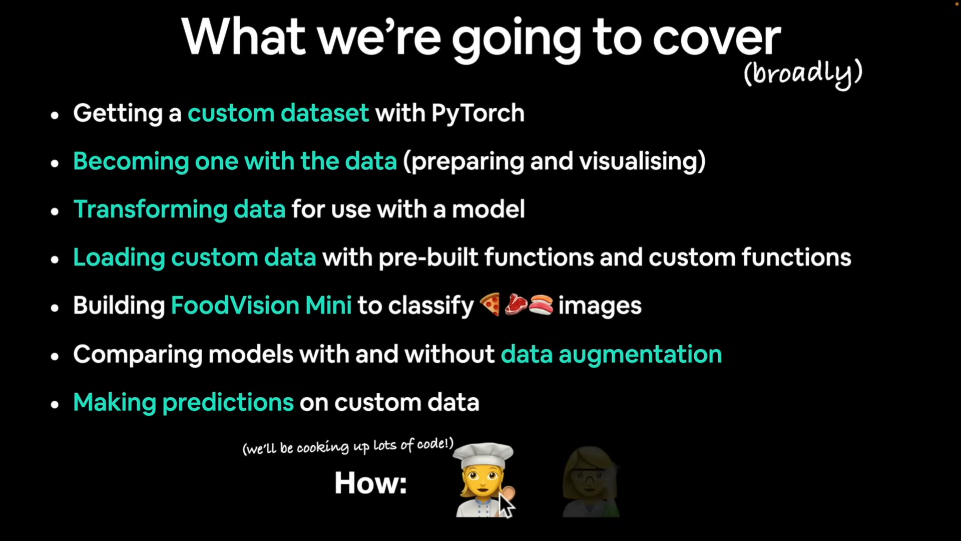)

1. How do you get your own data into PyTorch?
2. One of the way to do so is via: custom datasets.

## 0 . **Importing pytorch and setting device agnostic code.**


In [3]:
import torch
from torch import nn

In [4]:
# setup device agnostic code : coda hai to use cuda only
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
!nvdia-smi

/bin/bash: line 1: nvdia-smi: command not found


With GPU runtime set, we would have got similar to the following:

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 19h59m09s].png](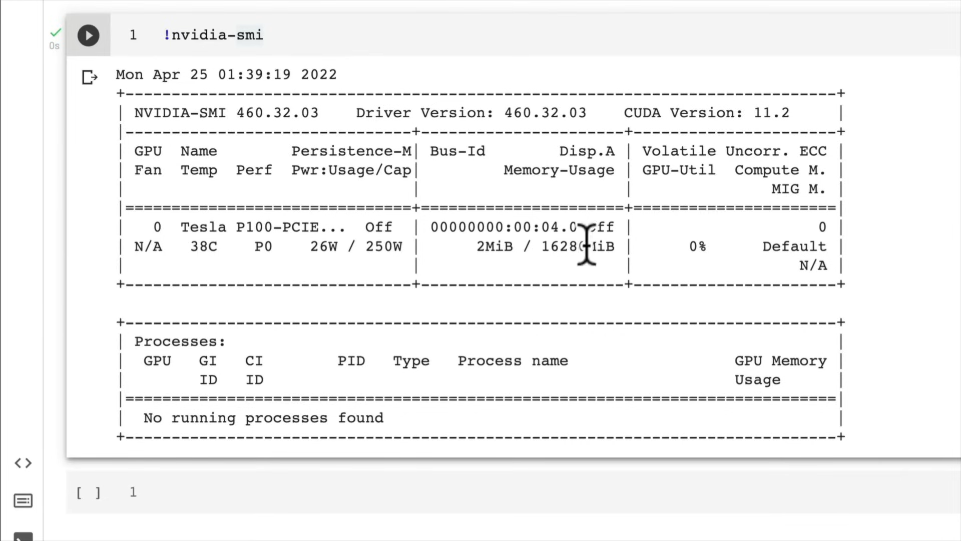)

1. Get Some Data : to build foodvision mini, get some food images. Food-101 model : 101 difference classs of the

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 20h00m12s].png](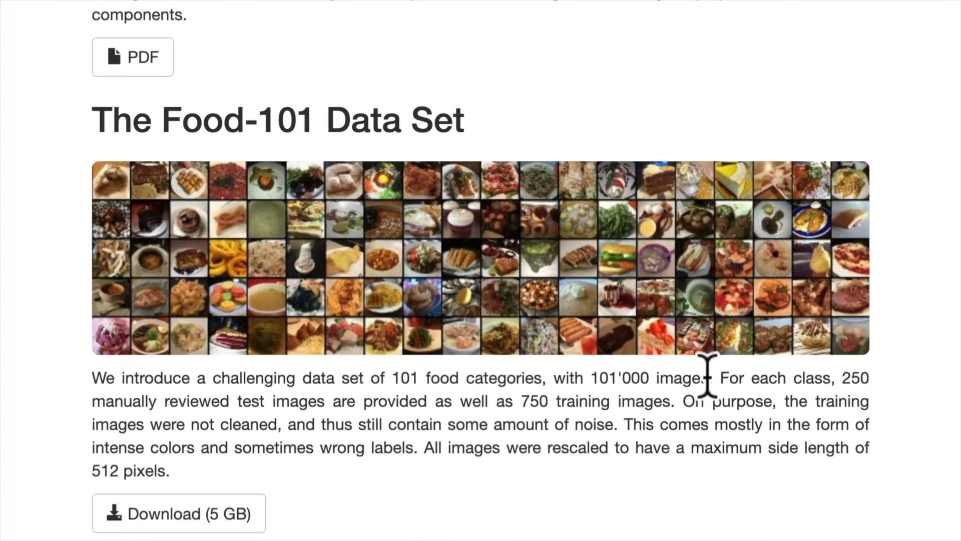)

For precticing, we are going to use small subset of it. Just 3 foods.

## **1. Get data**

Our dataset is a subset of the Food101 dataset

Food101 starts 101 different classes of food and 1000 images per class ( 750 training and 250 testing)

Our dataset starts with 3 classes of food and only 10% of the images ( 100 per class = 75 training and 25 testing)

Why do this ?

When starting out ML projects, it is important to try things on a small scale and then increase the scale when necessary.

The whole point is to speed up how fast you can experiment.

Code to download our own custom dataset.

In [6]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder does not exist, download it and prepare it ...
if image_path.is_dir():
  print(f"{image_path} directory already exists... Skipping download")
else:
  print(f"{image_path} does not exist, creating one....")
  image_path.mkdir(parents=True, exist_ok=True)


# Download pizza, steak, and sushi data
with open(data_path/ "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") # rigth click krke raw link copy kr lo
  print("Downloading pizza, steak and sushi data....")
  f.write(request.content)

# unzip pizza, steak , sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... Skipping download
Unzipping pizza, steak and sushi data...


Sure, let's break down the code piece by piece:

1. Importing Libraries:
```python
import requests
import zipfile
from pathlib import Path
```
Here, the script imports necessary libraries:
   - `requests`: This library allows the script to make HTTP requests to download files from the internet.
   - `zipfile`: This library provides tools to create, read, write, append, and list a ZIP file.
   - `Path` from `pathlib`: This library provides a way to work with filesystem paths in an object-oriented way.

2. Setting up paths:
```python
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
```
- `data_path`: This variable represents the path to the data folder. It's created using `Path("data/")`.
- `image_path`: This variable represents the path to a subfolder named "pizza_steak_sushi" inside the data folder. It's created by appending "pizza_steak_sushi" to `data_path`.

3. Checking if the image folder exists:
```python
if image_path.is_dir():
    print(f"{image_path} directory already exists... Skipping download")
else:
    print(f"{image_path} does not exist, creating one....")
    image_path.mkdir(parents=True, exist_ok=True)
```
This piece of code checks whether the `image_path` directory already exists. If it exists, it prints a message saying that the directory already exists and it skips the download. If it doesn't exist, it creates the directory using `mkdir()` method.

4. Downloading the ZIP file:
```python
with open(data_path/ "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak and sushi data....")
    f.write(request.content)
```
- This part of the code downloads a ZIP file from a URL using `requests.get()` method.
- It opens a file named "pizza_steak_sushi.zip" in binary write mode (`"wb"`).
- The content of the downloaded file is then written to the opened file i.e. "pizza_steak_sushi.zip".

5. Unzipping the ZIP file:
```python
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)
```
- This section of the code opens the downloaded ZIP file using `ZipFile()` method from the `zipfile` library.
- It extracts all the contents of the ZIP file into the `image_path` directory using `extractall()` method.

This results in organization of data like this:

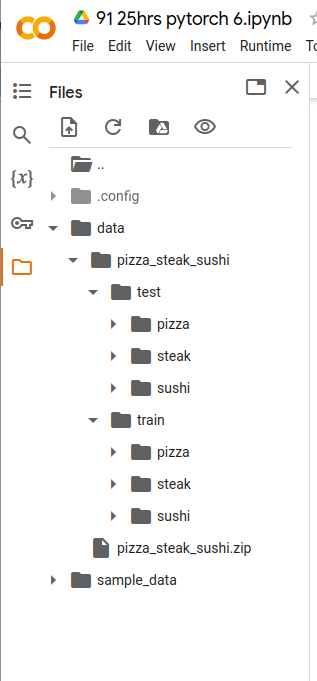

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 20h20m05s].png](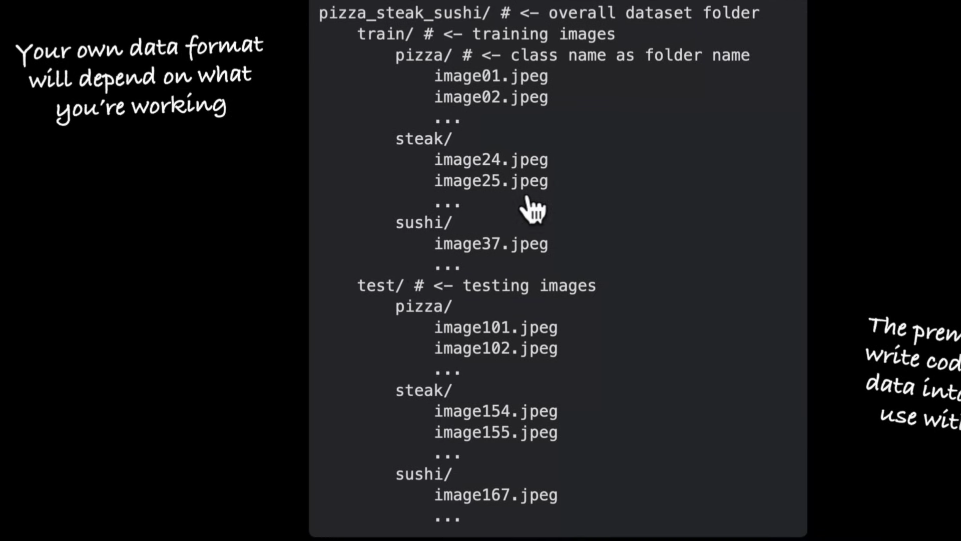)

## **2. Becoming one with the data ( data preparation and data explortion)**



In [7]:
import os
def walk_through_dir(dir_path):
  """Walk through dir_path returning its content."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [8]:
walk_through_dir(image_path) # remember image_path = data_path / "pizza_steak_sushi"

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


Of course, let's break down the code:

1. Importing the `os` module:
```python
import os
```
The `os` module in Python provides a way of interacting with the operating system. It offers functions for working with files and directories.

2. Defining the `walk_through_dir` function:
```python
def walk_through_dir(dir_path):
    """Walk through dir_path returning its content."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
```
- This code defines a function named `walk_through_dir` that takes one argument, `dir_path`, representing the path of the directory to be walked through.
- The function documentation string (docstring) explains its purpose.
- Inside the function, it uses `os.walk()` to traverse the directory tree rooted at `dir_path`.
- `os.walk()` generates the file names in a directory tree by walking the tree either top-down or bottom-up.
- In each iteration of the loop, it unpacks the tuple returned by `os.walk()` into `dirpath`, `dirnames`, and `filenames`.
- It then prints the number of directories (`len(dirnames)`) and the number of files (`len(filenames)`) found in the current directory (`dirpath`).

Here's how `os.walk()` works:
- `dirpath` is a string representing the path to the current directory being traversed.
- `dirnames` is a **list of strings** representing the **names of the subdirectories** in the current directory.
- `filenames` is a **list of strings** representing the **names of the non-directory files** in the current directory.

This function is useful for exploring the contents of a directory, especially when dealing with large directory structures or when you need to perform operations on each file or directory within a directory tree.

In [9]:
# set up training and test paths

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## **2.1 let's visualize some image**

Let's write some code to
1. Get all of the image paths
2. Pick a random image path using Python's random.choice( )
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL (pillow)
5. We will then show the image ans print metadata.

In [10]:
image_path

PosixPath('data/pizza_steak_sushi')

In [11]:
import random
from PIL import Image

# set seed
random.seed(42)

# we already have [image_path = data/pizza_steak_sushi]

# 1. Get all the image paths : glob = stick them all together
image_path_list = list(image_path.glob("*/*/*.jpg")) # 1st * = train and test, 2nd * = pizza, steak, sushu, and 3rd * = everything inside the pizza, steat and sushi

image_path_list

[PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/416067.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/398345.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/540882.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/648055.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/930553.jpg'),
 PosixPath('data/pizza_steak_su

In [12]:
import random
from PIL import Image

# set seed
random.seed(42)

# we already have [image_path = data/pizza_steak_sushi]

# 1. Get all the image paths : glob = stick them all together
image_path_list = list(image_path.glob("*/*/*.jpg")) # 1st * = train and test, 2nd * = pizza, steak, sushu, and 3rd * = everything inside the pizza, steat and sushi

# 2. Pick a random image path or random image also
random_image_path = random.choice(image_path_list)

random_image_path

PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg')

Image path list containg paths of images = image khan pr hai vo path + name of the image.. So path of the file = its complete path along with its name.

In [13]:
import random
from PIL import Image

# set seed
random.seed(42)

# we already have [image_path = data/pizza_steak_sushi]

# 1. Get all the image paths : glob = stick them all together
image_path_list = list(image_path.glob("*/*/*.jpg")) # 1st * = train and test, 2nd * = pizza, steak, sushu, and 3rd * = everything inside the pizza, steat and sushi

# 2. Pick a random image path or random image also
random_image_path = random.choice(image_path_list)

# 3. Get the image class form the path name (the image path is the name of the directory where the image is stored)
random_image_path.parent

PosixPath('data/pizza_steak_sushi/test/steak')

In [14]:
random_image_path.parent.stem ## see the magic, that is what we required

'steak'

steak
Random image path: data/pizza_steak_sushi/test/steak/354513.jpg
Image class: steak
Image height: 382
Inage width: 512


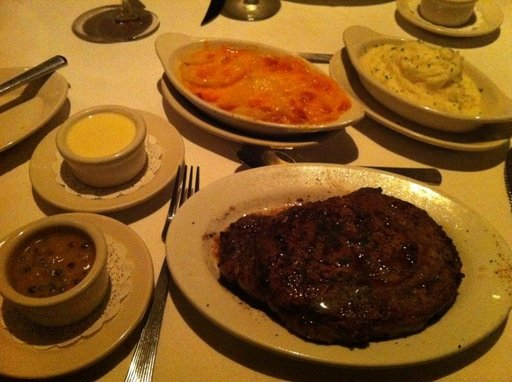

In [15]:
import random
from PIL import Image

# set seed
random.seed(42)

# we already have [image_path = data/pizza_steak_sushi]

# 1. Get all the image paths : glob = stick them all together
image_path_list = list(image_path.glob("*/*/*.jpg")) # 1st * = train and test, 2nd * = pizza, steak, sushu, and 3rd * = everything inside the pizza, steat and sushi

# 2. Pick a random image path or random image also
random_image_path = random.choice(image_path_list)

# 3. Get the image class form the path name (the image path is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Inage width: {img.width}")
img

**Visualizing the random image with matplotlib now, not with pil**

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# turn the image into an array : matplotlib numpy pr chlta hai
img_as_array = np.asarray(img)

In [17]:
img_as_array.shape

(382, 512, 3)

So it is a grayscale image. 2 channels 384 x 512

(-0.5, 511.5, 381.5, -0.5)

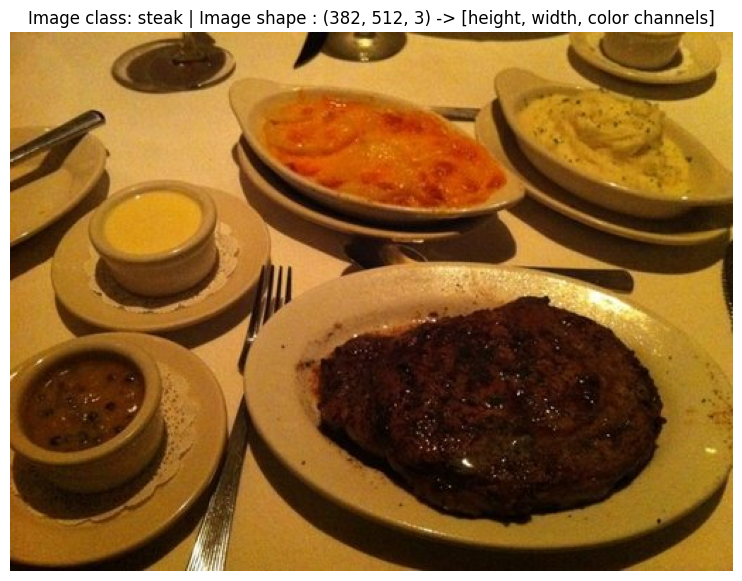

In [18]:
# plot the image with matplotlib
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape : {img_as_array.shape} -> [height, width, color channels]")
plt.axis(False)

Color channels at the last : default for pil, matplotlib.

But pytorch defaults color channels at the first. We can manupulate the order.

array([[[176, 117,  41],
        [178, 119,  43],
        [177, 120,  43],
        ...,
        [210, 164,  53],
        [205, 159,  47],
        [198, 152,  40]],

       [[178, 119,  43],
        [179, 120,  44],
        [179, 122,  45],
        ...,
        [212, 166,  55],
        [209, 163,  52],
        [204, 158,  46]],

       [[181, 121,  48],
        [183, 123,  50],
        [183, 126,  49],
        ...,
        [206, 159,  51],
        [204, 157,  49],
        [201, 155,  44]],

       ...,

       [[ 18,  10,   7],
        [ 19,  11,   8],
        [ 20,  11,   6],
        ...,
        [182, 127,  37],
        [176, 119,  30],
        [181, 124,  34]],

       [[ 19,  10,   5],
        [ 19,  10,   5],
        [ 19,  10,   5],
        ...,
        [179, 123,  36],
        [170, 113,  26],
        [176, 119,  30]],

       [[ 20,  11,   6],
        [ 19,  10,   5],
        [ 18,   9,   4],
        ...,
        [178, 122,  35],
        [170, 113,  26],
        [174, 117,  30]]], dtype=uint8)
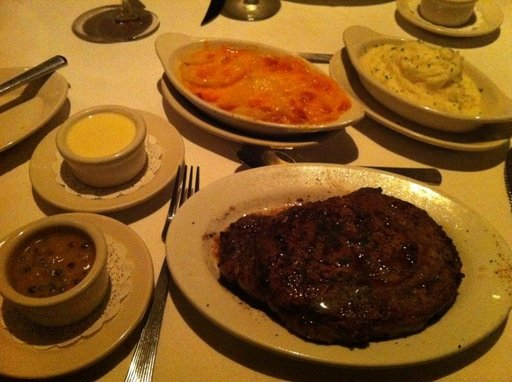

In [19]:
img_as_array

Visualize different random images, pta chalega bahut kuch. Like shapes are varying in terms of h and w. They all look like having 3 channels.

## 3. Transforming data

Before we can use our image data with pytorch:
1. Turn your target data into tensor : in our case it is going to be numerical representation of the tensors
2. Turn it into a `torch.utils.data.Dataset`(full data loading) and subsequently a `torch.utils.data.dataLoader` (for batch formation), we will call these `Dataset` and `DataLoader`

In [20]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 3.1 Transform data wit torchvision.transforms : image to tensor main transform

In [21]:
# Write a transform for image
# combining multiple transforms, u can also use nn.sequential
data_transform = transforms.Compose([
    # Resize out images to 64 x 64
    transforms.Resize(size=(64,64)),
    # flip the images randomly : data augmentation : artificially increasing the diversity of our dataset
    transforms.RandomHorizontalFlip(p=0.5), # 50 %  chances for horizontal axis ke abiut flip
    # Turn the image into a torch.Tensor
    transforms.ToTensor()  # [h, w, color channels] to [color channels, h, w]
])

In [22]:
# data_transform(img_as_array) # numpy array nhi chahiye, image should be pil image
data_transform(img) # direct image chalegi, use ye normalized[0,1] tensor me badal dega, but numpy array nhi bdlega

tensor([[[0.7216, 0.7412, 0.7490,  ..., 0.8118, 0.8039, 0.8157],
         [0.7176, 0.7490, 0.7765,  ..., 0.8118, 0.8118, 0.8431],
         [0.7176, 0.7529, 0.7804,  ..., 0.7922, 0.8039, 0.8431],
         ...,
         [0.5961, 0.6275, 0.6196,  ..., 0.7216, 0.7294, 0.7294],
         [0.4353, 0.5333, 0.5725,  ..., 0.7294, 0.7294, 0.7294],
         [0.1255, 0.1882, 0.2471,  ..., 0.7137, 0.7098, 0.7176]],

        [[0.5098, 0.5373, 0.5529,  ..., 0.6235, 0.6275, 0.6353],
         [0.5216, 0.5490, 0.5804,  ..., 0.6235, 0.6275, 0.6627],
         [0.5255, 0.5529, 0.5843,  ..., 0.6039, 0.6078, 0.6667],
         ...,
         [0.3569, 0.3686, 0.3843,  ..., 0.5294, 0.5333, 0.5294],
         [0.2431, 0.3098, 0.3451,  ..., 0.5255, 0.5294, 0.5216],
         [0.0510, 0.0824, 0.1255,  ..., 0.5176, 0.5216, 0.5059]],

        [[0.2039, 0.2275, 0.2392,  ..., 0.1686, 0.2118, 0.2157],
         [0.2196, 0.2471, 0.2706,  ..., 0.1765, 0.1961, 0.2196],
         [0.2000, 0.2353, 0.2706,  ..., 0.1608, 0.1804, 0.

In [23]:
data_transform(img).shape

torch.Size([3, 64, 64])

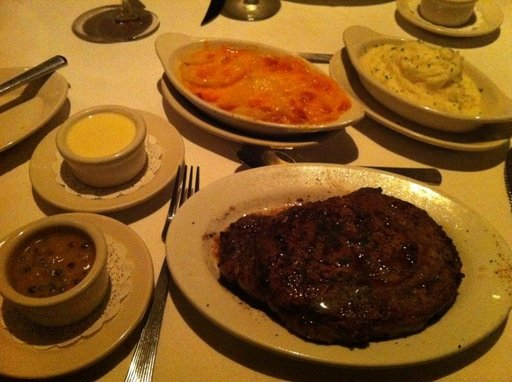

In [24]:
img

In [25]:
type(img) # PIL.JpegImagePlugin.JpegImageFile

PIL.JpegImagePlugin.JpegImageFile

In [26]:
# img.shape = error , not an array or tensor. It is pure image
img_as_array.shape # see h, w, c

(382, 512, 3)

In [27]:
## more experiments with the same compose function
data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
data_transform(img).shape

torch.Size([3, 224, 224])

see now h, w, c ho gya default order

In [28]:
# let's visualize the single tranformed image
# writting last time: Final transformation WEF now

# Write a transform for image
# combining multiple transforms, u can also use nn.sequential
data_transform = transforms.Compose([
    # Resize out images to 64 x 64
    transforms.Resize(size=(64,64)),
    # flip the images randomly : data augmentation : artificially increasing the diversity of our dataset
    transforms.RandomHorizontalFlip(p=0.5), # 50 %  chances for horizontal axis ke abiut flip
    # Turn the image into a torch.Tensor
    transforms.ToTensor()  # [h, w, color channels] to [color channels, h, w]
])

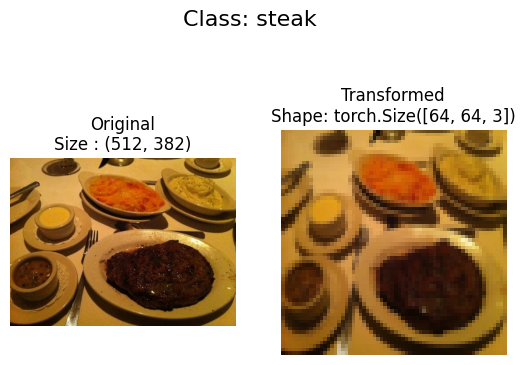

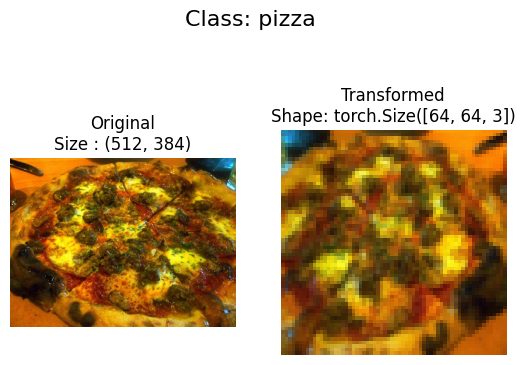

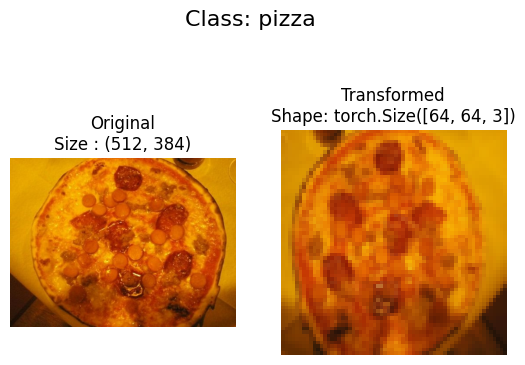

In [29]:
def plot_transformed_images(image_paths: list, transform,n=3, seed=None):
  """
  Selects 3 random images at a time from a path of images and loads/transforms them
  then plots the original vs transformed version
  """
  if seed :
    random.seed(seed)
  # selecting n random images
  random_image_paths = random.sample(image_paths, k=n) # a list of 3 image paths
  # loop through randomly sampled image path
  for image_path in random_image_paths: # one by one each image traversal
    with Image.open(image_path) as f: # Opens the image file using Image.open() from the Python Imaging Library (PIL) module, aliased as f.
      fig, ax = plt.subplots(nrows = 1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize : {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # note we will need to change shape for matplotlib: means h,w,c me badlna hoga, transform ise c,h,w me output deta hai. thats wy used permute:c,h,w->h,w,c
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off") # false vala bhi correct

      fig.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_paths = image_path_list,
                        transform=data_transform,
                        n = 3,
                        seed = 42)


Again, size is also is a hyperparameters. You can change as per imrpovement of the model

Thank God, meat(beef) vali dish nhi aayi.

Also see first image is flipped as well.

Let's understand the code:



This function, `plot_transformed_images`, is designed to visualize transformations applied to images. Let's break it down:

1. Function Definition:
```python
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
```
- `image_paths`: A list of paths to the images to be transformed and plotted.
- `transform`: The transformation function to be applied to the images.
- `n`: The number of random images to select and plot at a time. Default is 3.
- `seed`: Optional seed for reproducibility. Default is `None`.

2. Setting Random Seed (if provided):
```python
if seed:
    random.seed(seed)
```
- If a seed is provided, it sets the random seed to ensure reproducibility when selecting random images.

3. Selecting Random Images:
```python
random_image_paths = random.sample(image_paths, k=n)
```
- Randomly selects `n` image paths from the provided `image_paths` list using `random.sample()`.

4. Iterating Through Selected Images:
```python
for image_path in random_image_paths:
```
- Iterates through each randomly selected image path.

5. Opening and Plotting Images:
```python
with Image.open(image_path) as f:
```
- Opens the image file using `Image.open()` from the Python Imaging Library (PIL) module, aliased as `f`.
```python
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(f)
```
- Creates a figure and axes for plotting.
- Plots the original image on the first subplot (`ax[0]`).
```python
ax[0].set_title(f"Original\nSize: {f.size}")
ax[0].axis(False)
```
- Sets the title for the first subplot with the original image size.
- Turns off axis for the first subplot.
```python
transformed_image = transform(f).permute(1, 2, 0)
ax[1].imshow(transformed_image)
```
- Applies the provided transformation function (`transform`) to the image (`f`) and then permutes its dimensions to match the format required by Matplotlib (`HWC` instead of `CHW`).
- Plots the transformed image on the second subplot (`ax[1]`).
```python
ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
ax[1].axis("off")
```
- Sets the title for the second subplot with the transformed image shape.
- Turns off axis for the second subplot.
```python
fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
```
- Sets the super title of the figure with the class name obtained from the parent directory of the image file.

6. Calling the Function:
```python
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)
```
- Calls the `plot_transformed_images` function with:
  - `image_paths`: A list of image paths.
  - `transform`: The transformation function to be applied to the images.
  - `n`: The number of random images to select and plot at a time.
  - `seed`: The random seed for reproducibility.

**figure, axis = plt.subplots(nrows=1, ncols=3) ka explanation**

Certainly! The `fig, ax = plt.subplots()` line is a common pattern used in the Matplotlib library for creating subplots within a figure. Let's break it down:

- **`plt.subplots()`**: This function is used to create a figure and a set of subplots. It returns two objects: a `Figure` object representing the entire figure, and an array of `Axes` objects representing each subplot.

- **`fig, ax = plt.subplots(nrows, ncols)`**: This syntax unpacks the two objects returned by `plt.subplots()` into two variables: `fig` and `ax`. Here's what each variable represents:

    - `fig`: This variable represents the entire figure. It's the container for all the plots (or subplots) that you create.
    
    - `ax`: This variable represents an array of `Axes` objects, each corresponding to one subplot. The number of rows and columns in this array depends on the `nrows` and `ncols` parameters you pass to `plt.subplots()`.
    
- **`nrows` and `ncols`**: These parameters define the number of rows and columns of subplots in the figure. For example, if you pass `nrows=2` and `ncols=3`, it will create a 2x3 grid of subplots.

So, when you write `fig, ax = plt.subplots(nrows=1, ncols=2)`, you are creating a figure with one row and two columns of subplots. The `fig` variable represents the entire figure, while the `ax` variable is an array containing two `Axes` objects, one for each subplot. These `Axes` objects are where you will actually plot your data using methods like `ax.plot()`, `ax.scatter()`, `ax.imshow()`, etc.

This syntax is convenient because it allows you to easily access and manipulate individual subplots within a figure. For example, you can set properties of specific subplots using `ax[i, j]`, where `i` and `j` are row and column indices, respectively.

*to plot 2 images in one row i used plt.subplots(1,2);
then ploted and modified each of them by ax[0], ax[1]:
Suppose in case we said fig, ax = plt.sunplot(2,3)
then to plot each images individually using ax, what will be the syntax ?*

If you create a grid of subplots with `plt.subplots(2, 3)`, you'll get a 2x3 grid of subplots, meaning there are 2 rows and 3 columns of subplots. To plot images individually using the `ax` variable, you can access each subplot using its row and column indices.

Here's how you can plot images individually using `ax` in a 2x3 grid of subplots:

```python
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots
fig, ax = plt.subplots(2, 3)
# this syntax is helpful for plotting and modifing each subimages individually.

# Now, to plot an image on each subplot individually, you can access each subplot using ax[i, j]
# For example, to plot an image on the first subplot (top-left corner):
ax[0, 0].imshow(image1)
ax[0, 0].set_title('Image 1')

# To plot an image on the second subplot in the first row:
ax[0, 1].imshow(image2)
ax[0, 1].set_title('Image 2')

# Similarly, for the rest of the subplots
ax[0, 2].imshow(image3)
ax[0, 2].set_title('Image 3')

ax[1, 0].imshow(image4)
ax[1, 0].set_title('Image 4')

ax[1, 1].imshow(image5)
ax[1, 1].set_title('Image 5')

ax[1, 2].imshow(image6)
ax[1, 2].set_title('Image 6')

# Optionally, you can turn off the axis for each subplot
for row in ax:
    for subplot in row:
        subplot.axis('off')

# Show the plots
plt.show()
```

In this example:
- `ax[0, 0]` refers to the subplot in the first row and first column.
- `ax[0, 1]` refers to the subplot in the first row and second column.
- `ax[1, 0]` refers to the subplot in the second row and first column.
- And so on...

You can plot images or customize each subplot individually by accessing them using their row and column indices.

## 4. Option 1: Loading Image data using `ImageFolder`

We can load image classification data using `torchvision.dataset.ImageFolder`

In [30]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [31]:
test_dir

PosixPath('data/pizza_steak_sushi/test')

In [32]:
# Use imagefolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform, # a transform for the data
                                  target_transform = None) # a transform for the target/label : rn nothing since in our case we don't need transform the data

test_data = datasets.ImageFolder(root=test_dir,
                                transform = data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [33]:
# get classes
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [34]:
# get class names as dictionary
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [35]:
# check the lengths of our datasets
len(train_data), len(test_data)

(225, 75)

In [36]:
print(test_data.targets) # to se labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [37]:
print(train_data.samples[0])

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)


# lets visualize a train data.


In [38]:
# index on the train_data dataset to get a single image and label
train_data[0] # gives image tensor and corresponding label.

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

image is pizza, since label is 0

In [39]:
img, label = train_data[0][0],train_data[0][1]

In [40]:
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [41]:
label

0

Target image in tensor, and label in numerical format, that is exactly we want

In [42]:
class_names[label]

'pizza'

In [43]:
img, label = train_data[0][0],train_data[0][1] # first image of the train_data
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label dtype: {type(label)}")

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

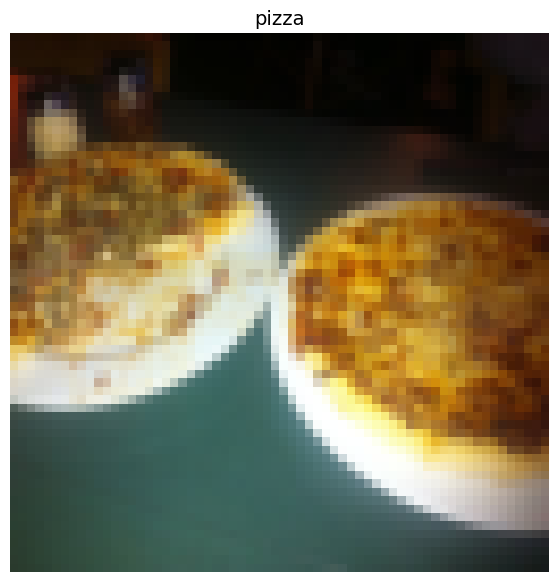

In [44]:
# lets try and plot this, and have a llok how is looks like: matplotlib wants color channels at last
img_permute = img.permute(1,2,0)

# print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

## 4.2 Turing our image dataset( loaded images) into image dataloader's : turning data into iterables or batchify the data.

A `dataloader` is going to help us turn our `Dataset's` into iterables and we can customize the `batch_size` so our model can see `batch_images` at a time.

We will write a general code that will be application while using gpu or cpu.

Instead of showing all the images at a time, we will shown only 32 images to the model, show that the space avaiable will not be exhausted.

Batching is helpful when we have so many ia=mages and less RAM, Hard disk space.

In [45]:
import os
os.cpu_count() # number of cores google colab provides us.

2

In [46]:
# Turn train and test datasets into DataLoader(s) : sice loading all = hardware may run ot of memory

from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                               batch_size = BATCH_SIZE,
                               num_workers = os.cpu_count(),# that is multithreading. use as many as possible
                               shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c49e7a02110>,
 <torch.utils.data.dataloader.DataLoader at 0x7c49e7a01c60>)

In [47]:
len(train_dataloader), len(test_dataloader) # look at 32 images at a time, 225/32 = 7.03, so 7 full, 8th keval 3%. Similarly for the test

(8, 3)

In [48]:
img_batch, label_batch = next(iter(train_dataloader)) # this gives a batch of images consisting of 32 rgb images

# our dataloader add an extra batch dimensions
print(f"Image shape: {img_batch.shape} -> [batch size, color channels, height, width]")
print(f"Label shape: {label_batch.shape}") # now 32 size 1D tensor, consistng of labels

Image shape: torch.Size([32, 3, 64, 64]) -> [batch size, color channels, height, width]
Label shape: torch.Size([32])


Let's replicate the functionality of image Loader by creating our own image loader class

We want 2 things here:
1. Write a class that is capable of loading data
2. we want class names as a list,
3. we want class names as a dictionary as well



## 5.1 Option 2: Loading image data with a cusom dataset : by class created by us.

1. Want to be able to load images from file
2. Want to be able to get class names from the dataset
3. Want to be able to get classes as dictionary from the dataset.

Pros:
* We can create a `Dataset` out of almost anything.
* Not limited to PyTorch pre-built `Dataset` function.

Cons:
* Even though you could create `Dataset` out of almost anything, it does not mean it will work...
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 21h30m24s].png](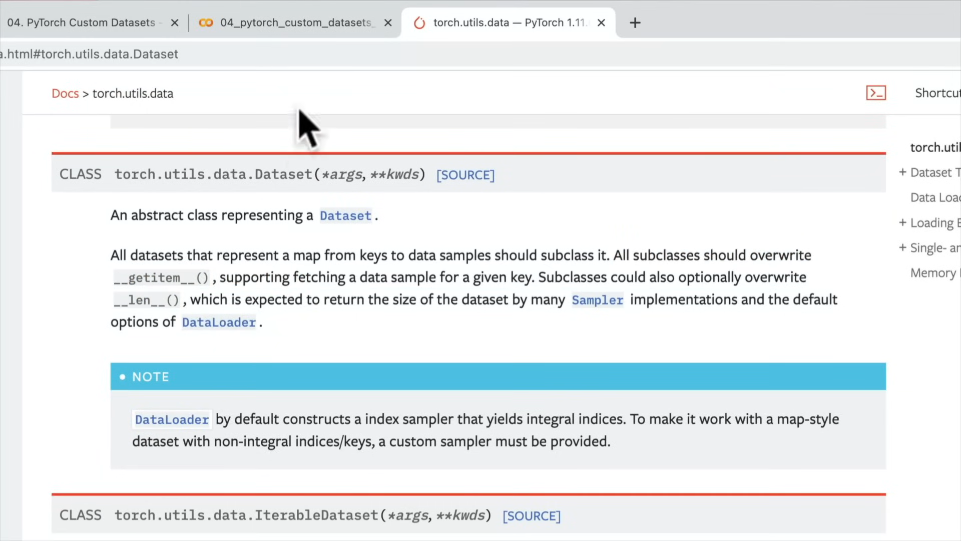)

In [49]:
import os # working with file path system
import pathlib
import torch

from PIL import Image # to open images
from torch.utils.data import Dataset # base dataset
from torchvision import transforms
from typing import Tuple, Dict, List# type hints

Let's break down each import and its purpose:

1. `from torch.utils.data import Dataset`:
   - This import statement brings in the `Dataset` class from the `torch.utils.data` module.
   - The `Dataset` class is a PyTorch class that represents a dataset. It's an abstract class that you can subclass to create custom datasets for training, validation, or testing in PyTorch.
   - By importing this class, you can create your own custom dataset class by subclassing `Dataset` and implementing methods like `__len__()` and `__getitem__()`.

2. `from typing import Tuple, Dict, List`:
   - This import statement brings in type hints from the `typing` module.
   - `Tuple`, `Dict`, and `List` are generic types used for type hinting in Python.
   - `Tuple` represents a fixed-size collection of heterogeneous elements.
   - `Dict` represents a dictionary or a mapping from keys to values.
   - `List` represents a mutable sequence of elements.
   - These type hints are often used to specify the expected types of function arguments, return values, and variables in Python code. They help improve code readability and catch type-related errors early during development.

In summary, these import statements are used to bring in necessary classes and type hints for working with datasets and defining the types of variables and function parameters in Python code that follows best practices and utilizes type hints for clarity and robustness.

In [50]:
# Instance of torchvision.dataset.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

All custom datasets in pytorch often subclass :
`torch.utils.data.Dataset`, that mean inheritted from `torch.utils.data.Dataset`.



## 5.1 Creating a helper function to get class names
We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names are not found (if this happens, there might be something wrong with the directry structure).
3. Turn the class names into a dict and a list and return them.

In [51]:
# Setup path for the target directory
target_directory = train_dir
target_directory

PosixPath('data/pizza_steak_sushi/train')

In [52]:
# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [53]:
os.scandir(target_directory)

In [54]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 21h37m00s].png](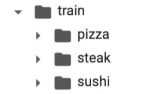)

In [55]:
# Create a dictionary where keys are file names and values are DirEntry objects
entries_dict = {}
for entry in os.scandir(target_directory):
    entries_dict[entry.name] = entry

print(entries_dict)

{'pizza': <DirEntry 'pizza'>, 'sushi': <DirEntry 'sushi'>, 'steak': <DirEntry 'steak'>}


we wanted to return:  (['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [56]:
def find_classes(directory:str)->Tuple[ List[str], Dict[str,int] ]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  return classes


In [57]:
find_classes(target_directory)

['pizza', 'steak', 'sushi']

In [58]:
def find_classes(directory:str)->Tuple[ List[str], Dict[str,int] ]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Could not found any classes in {directory}...please recheck the file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)} # (class name,i): for index, class name in enumerate(classes)
  return classes, class_to_idx

In [59]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

**Create a custom `dataset` to replicate `ImageFolder` , by subclassing from torch.utils.data.Datasets**

To create our own custom dataset, we want to
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory(the directory we would like to get data from) as well as a transform if we would like to transform our data.

3. Create several attributes:
* paths - paths of our images
* transform - the transform we would like to use
* classes - a list of the target images
* class_to_idx - a dict of the target classes mapped to integer labels

4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len()__` method to return the length of our dataset.
6. Overwrite the `__getitem()__` method to return a given sample when passed an index.

In [60]:
img, label = train_data[0]
img, label # __getitem()__is going to replicate this.

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

Replicating the functionality of ImageFolder data loader class.

In [61]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,targ_dir:str, transform:None):
    # 3. create class attributes
    # get all the images paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # last * = all the files, before thst * = just ek upar ki directory
    # Setup transform
    self.transform = transform

    # create classes and class_to_index attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index:int) -> Image.Image:
    """Opens an image via a path and returns it."""
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    """Returns one sample of data, data and label: (X,y)."""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expect path in format : data_loader/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform(target iamge) if necessary.
    if self.transform:
      return self.transform(img), class_idx # return data, label (X,y)
    else :
      return img, class_idx # returns untransformed image and label

You've created a custom dataset class `ImageFolderCustom` for handling image data. Let's go through each part of the class:

1. **Importing Libraries and Setting Up Class**:
   - You import necessary libraries at the beginning, including `Dataset` from `torch.utils.data` and `Image` from `PIL`.
   - You define your custom dataset class `ImageFolderCustom` by subclassing `Dataset`.

2. **Initialization** (`__init__`):
   - You initialize your custom dataset with two parameters: `targ_dir` (target directory containing images) and `transform` (optional transformations to be applied to images).
   - You create class attributes `self.paths` to store image paths and `self.transform` to store transformation functions.
   - You call `find_classes(target_dir)` to get class names and their corresponding indices.

3. **Loading Images** (`load_image`):
   - You define a method `load_image` to load an image given its index in the dataset.
   - It opens the image using `Image.open()` from PIL and returns it.

4. **Getting Dataset Length** (`__len__`):
   - You override the `__len__` method to return the total number of samples in the dataset, which is the length of `self.paths`.

5. **Getting Dataset Item** (`__getitem__`):
   - You override the `__getitem__` method to return a particular sample of data given its index.
   - It loads an image using `load_image`, retrieves its class name from the path, and converts the class name to its corresponding index using `self.class_to_idx`.
   - If `transform` is provided, it applies the transformation to the image and returns the transformed image along with its label. Otherwise, it returns the original image and its label.

Overall, this class is well-structured and designed to handle image datasets efficiently. It encapsulates the logic for loading images, applying transformations, and accessing dataset samples, making it easy to use with PyTorch's data loading utilities.

In [62]:
# create a transform
from torchvision.transforms import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [63]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                     transform = test_transforms)

In [64]:
train_data_custom

In [65]:
test_data_custom

In [66]:
len(train_data), len(train_data_custom)

(225, 225)

In [67]:
len(test_data), len(test_data_custom)

(75, 75)

In [68]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [69]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

Yes, we are getting everything same.

In [70]:
# checkfor equality between original ImageFolder and ImageFolderCustomDataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


**Hence we have successfully replicated the main functionality of the imagefolder dataset class.**

Let's create functions to display some random images, from our train_data_custom class.

1. Take in a `Dataset` and a number of other parameters such as class names and 'how many images to visualize'
2. To prevent the display getting out of hand, let's cap the number of images to loop at. 10 by default or in case more than 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot
6. Loop through the random sample images and plot them with matplotlib
7. Make sure the dimensions of our images line up with matplotlib.


In [71]:
random.sample(range(len(train_data_custom)), k=10) # total range me se 10 numbers uthakar de deega.

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

In [72]:
# Create a function to take in a dataset.
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n : int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purpose n should not be larger than 10. setting to 10 and removing shape display")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_sample_idx = random.sample(range(len(dataset)), k=n)

  # 5. setup plot
  plt.figure(figsize=(16,8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0) # [color image, height, width] -> [height, width, color_channels]

    # 8. plot adjusted sample
    plt.subplot(1,n,i+1) # subplot and subplots, are two different functions.
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Classes: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

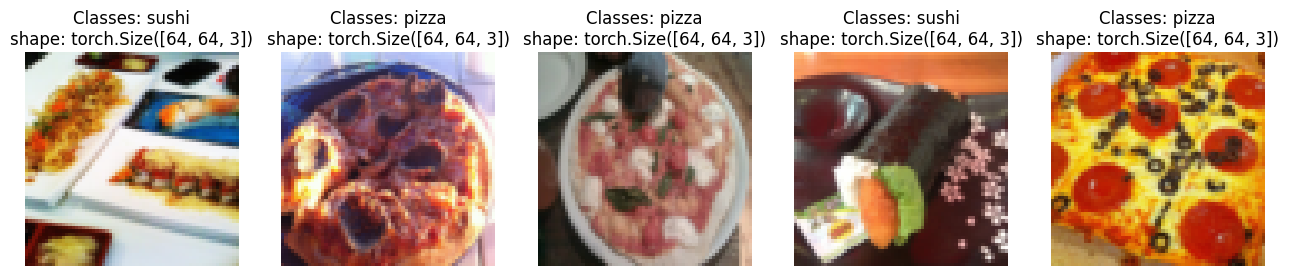

In [73]:
# display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes = class_names,
                      seed = 42)

The functions `subplot()` and `subplots()` in Matplotlib are both used to create subplots within a figure, but they have different syntax and functionality.

1. `subplot()`:
   - `subplot()` is a function used to create a single subplot within a figure.
   - It is used when you want to create a single subplot or when you want to manually specify the position of the subplot within the figure.
   - The syntax for `subplot()` is:
     ```python
     plt.subplot(num_rows, num_cols, subplot_index)
     ```
     - `num_rows` and `num_cols` specify the number of rows and columns in the grid of subplots.
     - `subplot_index` specifies the position of the subplot within the grid, starting from 1 and increasing row-wise.
     - For example, `plt.subplot(2, 2, 1)` creates a subplot at the top-left position in a 2x2 grid of subplots.

2. `subplots()`:
   - `subplots()` is a function used to create multiple subplots within a single figure at once.
   - It is a higher-level function that automatically creates and arranges subplots in a grid within the figure.
   - The syntax for `subplots()` is:
     ```python
     fig, axes = plt.subplots(num_rows, num_cols)
     ```
     - `num_rows` and `num_cols` specify the number of rows and columns in the grid of subplots.
     - It returns both the `Figure` object (`fig`) representing the entire figure and an array of `Axes` objects (`axes`) representing each subplot.
     - You can then use the `axes` array to access and modify individual subplots.
     - For example, `fig, axes = plt.subplots(2, 2)` creates a 2x2 grid of subplots.

In summary:
- Use `subplot()` when you want to create a single subplot or manually specify the position of each subplot within the figure.
- Use `subplots()` when you want to create multiple subplots at once and let Matplotlib handle the layout automatically.

For display purpose n should not be larger than 10. setting to 10 and removing shape display


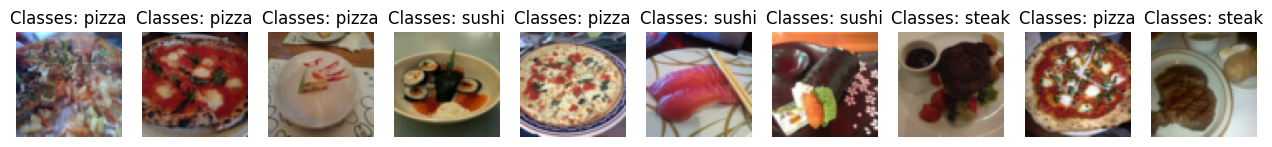

In [74]:
# display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=20,
                      classes = class_names,
                      seed = None)

## Turning out custom datasets into DataLoaders : Batchify.

In [75]:
# Using pytorch built in dataloader
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count() # multithreading, os.cpu_count = number of available threads
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = 0,
                                     shuffle = True)

test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                    batch_size = BATCH_SIZE,
                                    num_workers = 0,
                                    shuffle = False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7c49e6d36b00>,
 <torch.utils.data.dataloader.DataLoader at 0x7c49e6d6faf0>)

In [76]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other Forms of transformations ( Data Augmentation)

Data Augmentation is a process of artificially adding diversity to your training data.

In the case of image data, this may mean applying various image transformations to the training images

This practice hopefully results in  model that's more generalizable to unseen data.

Let's take a loop at one particular type of data augmentation used to train PyTorch vision model to state of the art levels....

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 22h38m13s].png](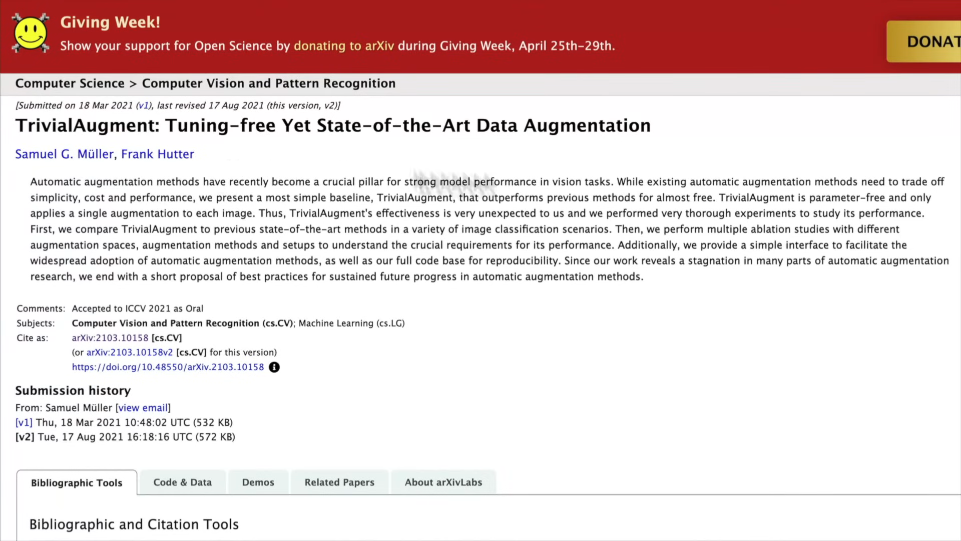)

In [77]:
# Let's look at TrivialAugment : changes images in few different ways
# trivialaugmentation leverages the power of randomness quite beautifully.

from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31), # 0 to 31 : intensity of augmentation: like for rotation : complete rotation
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.ToTensor()
])

In [78]:
# Get all the image paths again
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/416067.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/398345.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg')]

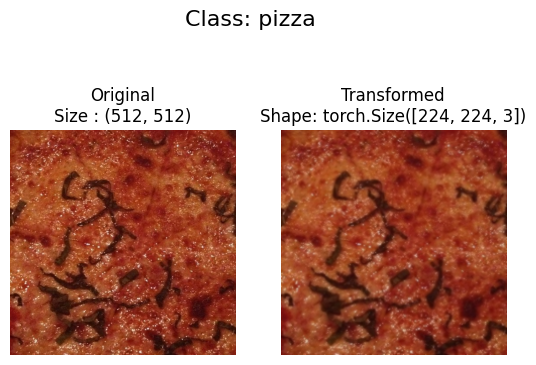

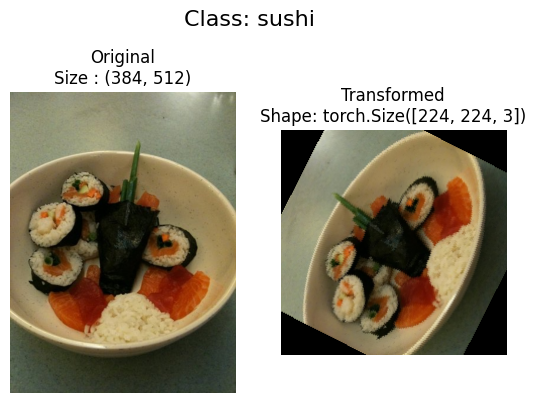

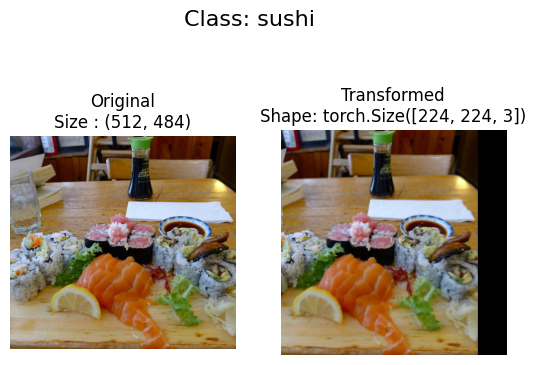

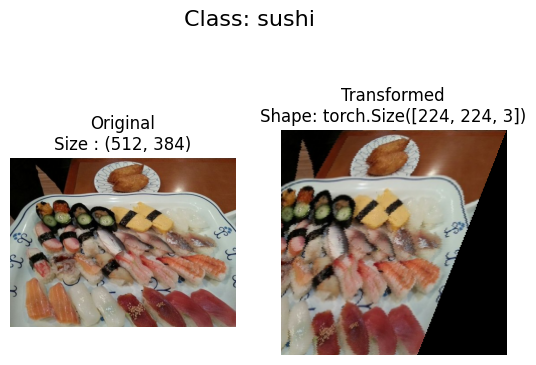

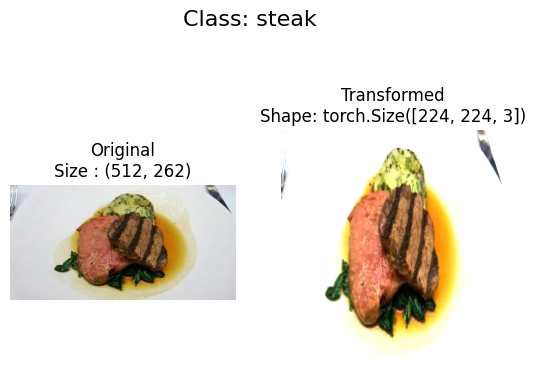

In [79]:
# Plot random transformed images
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transform,
    n = 5,
    seed =4
)

TrivialAugment is the most state-of-the-art data augmentation for vision models:

State of the art : the most recent stage in the development of a product, incorporating the newest technology, ideas, and features.

## 7. Model 0: Reuse TinyVGG architecture without data-augmentation

Let's replicate the TinyVGG architecture from the CNN explainer website.

### 7.1 Creating transforms and loading data for model 0

In [80]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
])

In [81]:
# 1. Load and transform data
from torchvision import datasets # to load all the images <-> ImageFolder function used
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

# 2. Turn the datasets into Dataloader  # to load images into batches <-> DataLoader Function used
import os
from torch.utils.data import DataLoader

# setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()//2 # integer division: //

# Create DataLoaders
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     num_workers = NUM_WORKERS)


In [82]:
NUM_WORKERS

1

Adding test dataloader as well in the above code.

In [83]:
# 1. Load and transform data
from torchvision import datasets # to load all the images <-> ImageFolder function used : required since custom dataset hai and propely arranged hai, otherwise direct imageloader i.e. batchify enough tha.
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

# 2. Turn the datasets into Dataloader  # to load images into batches <-> DataLoader Function used
import os
from torch.utils.data import DataLoader

# setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()//2 # integer division: //

# Create DataLoaders
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle = True,
                                     num_workers = NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = os.cpu_count())

### 7.2 Create TinyVGG model

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 22h51m43s].png](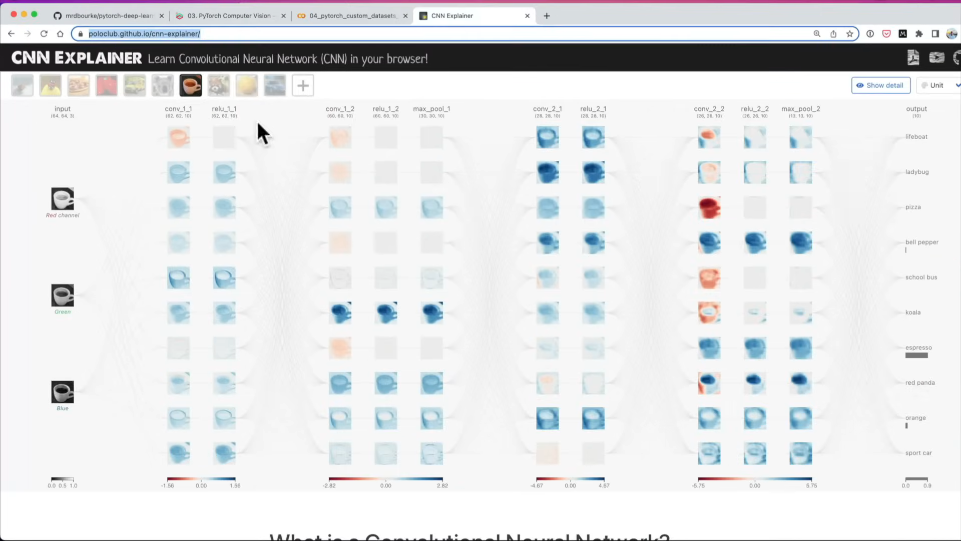)

Only one change wrt our previously created TinyVGG replicate : is number of color channels 1 to 3 this time.

In [84]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 0, # will get it in form of error and then will update it. but this time we won't update here. We will write this whole block again and update in that block.#  We can use formula as well
                  out_features = output_shape
                  )
    )

  def forward(self, x):
      x = self.conv_block_1(x)
      print(x.shape)
      x = self.conv_block_2(x)
      print(x.shape) # this is the thing, which we want for completing the classifier layer
      x = self.classifier(x) # this is where model will start throwing error, since shape mismatch
      print(x.shape)
      return x
      # upar vala : coputation <-> back_to_memory; 3-4 bar hoga, neeche vala me only 1 bar. Hence neeche vali 1 line faster than upar ki 4 line. Altough both do the same thing.

      # alternate of aboves lines, just 1 line :
      # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion, speeds up, because of no reassignment.


In [85]:
# creating instance of the model
torch.manual_seed(4)
model_0 = TinyVGG(input_shape = 3, # number of color channels
                  hidden_units = 10, # same as in tinyvgg architecture,
                  output_shape = len(class_names)
                  ).to(device)

model_0

/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=0, out_features=3, bias=True)
  )
)

**Now We can find the right input shape for classifier, by passing some dummy input to our model**

### 7.3 Try a forward pass on a single Image (to get the shape required for input in classificatio layer)

In [86]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [87]:
# try a dummy forward pass
model_0(image_batch.to(device))

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2560 and 0x3)

Got the required size. torch.Size([32, 10, 16, 16])

A tensor of this size goes into flatten layer.

Updating the shape.

In [88]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 10*16*16,  # 32*10*16*16 nhi, since we are passing batch of 32 images. It will take 32 from there
                  out_features = output_shape
                  )
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape) # this is the thing, which we want for completing the classifier layer
    x = self.classifier(x) # this is where model will start throwing error, since shape mismatch
    # print(x.shape)
    return x
    # upar vala : coputation <-> back_to_memory; 3-4 bar hoga, neeche vala me only 1 bar. Hence neeche vali 1 line faster than upar ki 4 line. Altough both do the same thing.

    # alternate of aboves lines, just 1 line :
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion, speeds up, because of no reassignment.


In [89]:
# creating instance of the model
torch.manual_seed(4)
model_0 = TinyVGG(input_shape = 3, # number of color channels
                  hidden_units = 10, # same as in tinyvgg architecture,
                  output_shape = len(class_names)
                  ).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [90]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [91]:
# try a dummy forward pass

model_0(image_batch.to(device))

tensor([[-0.0189, -0.0594, -0.0332],
        [-0.0320, -0.0699, -0.0426],
        [-0.0181, -0.0598, -0.0338],
        [-0.0227, -0.0597, -0.0371],
        [-0.0234, -0.0575, -0.0355],
        [-0.0198, -0.0591, -0.0354],
        [-0.0179, -0.0582, -0.0370],
        [-0.0265, -0.0709, -0.0389],
        [-0.0221, -0.0639, -0.0343],
        [-0.0217, -0.0636, -0.0361],
        [-0.0205, -0.0621, -0.0321],
        [-0.0307, -0.0699, -0.0390],
        [-0.0234, -0.0622, -0.0323],
        [-0.0251, -0.0590, -0.0333],
        [-0.0168, -0.0620, -0.0337],
        [-0.0216, -0.0624, -0.0384],
        [-0.0241, -0.0592, -0.0396],
        [-0.0202, -0.0616, -0.0326],
        [-0.0232, -0.0628, -0.0399],
        [-0.0189, -0.0618, -0.0347],
        [-0.0202, -0.0632, -0.0337],
        [-0.0221, -0.0651, -0.0362],
        [-0.0290, -0.0615, -0.0424],
        [-0.0236, -0.0601, -0.0332],
        [-0.0263, -0.0657, -0.0442],
        [-0.0225, -0.0640, -0.0384],
        [-0.0229, -0.0626, -0.0373],
 

Output for a batch of 32 images, without the training of the model, i.e. output just because of random parameters.

### Use `torchinfo` to get an idea of the shapes going through our model

In [92]:
import torchinfo

In [93]:
# install torchinfo
! pip install torchinfo

In [94]:
from torchinfo import summary

In [95]:
summary(model_0, input_size = (1,3,224,224))

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Flatten: 2]

In [96]:
summary(model_0, input_size = (1,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

So torchinfo is helpful in getting how parameters or shapes etc are changing layer by layer. UIn this case, we don't need to use print statements in the forward passes.

In a nutshell, just gives an idea of the input and the output shapes of each and every layers.

### 7.5 Create train and test loops functions

* `train_step()` - takes in a model and dataloader and trains the model on the dataloader

* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader.

In [97]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=torch.device('cpu')):
    # put the model in train mode
    model.train()

    # setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for batch, (X, y) in enumerate(dataloader):
        # send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1) # will give label
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


In [98]:
# create a test step
def test_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  # put model in eval mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0 , 0

  # Turn on the inference mode
  with torch.inference_mode():
    # loop through dataloader and batches
    for batch, (X,y) in enumerate(dataloader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y)).sum().item()/len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


### 7.6 Create a `train()` function to combine `train_step()` and `test_step()`

In [99]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizers + dataloaders +loss functions etc
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), # setting default value. In case input for this argument, it will be used
          epochs: int = 5,
          device = device):
  # 2. to keep track of results at every epochs, we need to create a dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)
    # 4. Print out what is happening
    print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

  # 5. Update our results dictionary after every epochs
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)

  # 6. Return the filled return at the end of epochs
  return results


### 7.7 Training and evaluating model_0

In [100]:
# set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3, # number of color channels of our target images
                  hidden_units = 10,
                  output_shape = len(train_data.classes)
                  ).to(device)

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001, # default is also 0.001 of Adam
                             )

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how log it took
end_time = timer()
print(f"Total trainig time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | train loss: 1.1078 | train acc: 0.2578 | test loss: 1.1362 | Test acc: 0.2604
Epoch: 1 | train loss: 1.0846 | train acc: 0.4258 | test loss: 1.1622 | Test acc: 0.1979
Epoch: 2 | train loss: 1.1153 | train acc: 0.2930 | test loss: 1.1695 | Test acc: 0.1979
Epoch: 3 | train loss: 1.0990 | train acc: 0.2891 | test loss: 1.1343 | Test acc: 0.1979
Epoch: 4 | train loss: 1.0990 | train acc: 0.2930 | test loss: 1.1434 | Test acc: 0.1979
Epoch: 5 | train loss: 1.0964 | train acc: 0.3125 | test loss: 1.1483 | Test acc: 0.2604
Epoch: 6 | train loss: 1.1187 | train acc: 0.3203 | test loss: 1.1423 | Test acc: 0.3125
Epoch: 7 | train loss: 1.1015 | train acc: 0.3555 | test loss: 1.1051 | Test acc: 0.1979
Epoch: 8 | train loss: 1.0893 | train acc: 0.4688 | test loss: 1.0687 | Test acc: 0.5417
Epoch: 9 | train loss: 1.0683 | train acc: 0.4023 | test loss: 1.0169 | Test acc: 0.5417
Total trainig time: 25.645 seconds


Even if the model guess a class randomly , there are 30 % chances to get write guess. So the model is performing simaler to the random guess.

Changing possibilities: learning rate, activation function ( relu to something else), increasing layers, adding more hidden layers, or changing the loss function etc. But loss function is fgood i.e. crosentropy loss. Iske alava kuch bhi change kro.

#### One try, lr = 0.01, and epochs = 50; let's see what happens

In [101]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 10*16*16,  # 32*10*16*16 nhi, since we are passing batch of 32 images. It will take 32 from there
                  out_features = output_shape
                  )
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=torch.device('cpu')):
    # put the model in train mode
    model.train()

    # setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for batch, (X, y) in enumerate(dataloader):
        # send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1) # will give label
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

# create a test step
def test_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  # put model in eval mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0 , 0

  # Turn on the inference mode
  with torch.inference_mode():
    # loop through dataloader and batches
    for batch, (X,y) in enumerate(dataloader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y)).sum().item()/len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

from tqdm.auto import tqdm

# Create a train() function to combine train_step() and test_step()
# 1. Create a train function that takes in various model parameters + optimizers + dataloaders +loss functions etc
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), # setting default value. In case input for this argument, it will be used
          epochs: int = 5,
          device = device):
  # 2. to keep track of results at every epochs, we need to create a dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)
    # 4. Print out what is happening
    print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

  # 5. Update our results dictionary after every epochs
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)

  # 6. Return the filled return at the end of epochs
  return results

# training and evaluating model, changed lr = 0.1 and epochs = 20
# set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3, # number of color channels of our target images
                  hidden_units = 10,
                  output_shape = len(train_data.classes)
                  ).to(device)

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.1,
                             )

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how log it took
end_time = timer()
print(f"Total trainig time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train loss: 7.3878 | train acc: 0.3789 | test loss: 1.1087 | Test acc: 0.1979
Epoch: 1 | train loss: 1.0863 | train acc: 0.4141 | test loss: 1.1460 | Test acc: 0.1979
Epoch: 2 | train loss: 1.1169 | train acc: 0.2930 | test loss: 1.1762 | Test acc: 0.1979
Epoch: 3 | train loss: 1.0998 | train acc: 0.3047 | test loss: 1.1583 | Test acc: 0.2604
Epoch: 4 | train loss: 1.0980 | train acc: 0.2734 | test loss: 1.1614 | Test acc: 0.1979
Epoch: 5 | train loss: 1.1090 | train acc: 0.3047 | test loss: 1.1537 | Test acc: 0.2604
Epoch: 6 | train loss: 1.1199 | train acc: 0.3047 | test loss: 1.1354 | Test acc: 0.1979
Epoch: 7 | train loss: 1.0897 | train acc: 0.4375 | test loss: 1.0678 | Test acc: 0.5417
Epoch: 8 | train loss: 1.0843 | train acc: 0.4023 | test loss: 1.0354 | Test acc: 0.5417
Epoch: 9 | train loss: 1.0931 | train acc: 0.4023 | test loss: 1.0317 | Test acc: 0.5417
Epoch: 10 | train loss: 1.0948 | train acc: 0.4023 | test loss: 1.0398 | Test acc: 0.5417
Epoch: 11 | train lo

Not very much improvement, seems like model is guessing randomly. Let's remove the non linear layers to see what  happens

In [102]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        # nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        # nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        # nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        # nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 10*16*16,  # 32*10*16*16 nhi, since we are passing batch of 32 images. It will take 32 from there
                  out_features = output_shape
                  )
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=torch.device('cpu')):
    # put the model in train mode
    model.train()

    # setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for batch, (X, y) in enumerate(dataloader):
        # send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1) # will give label
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

# create a test step
def test_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  # put model in eval mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0 , 0

  # Turn on the inference mode
  with torch.inference_mode():
    # loop through dataloader and batches
    for batch, (X,y) in enumerate(dataloader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y)).sum().item()/len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

from tqdm.auto import tqdm

# Create a train() function to combine train_step() and test_step()
# 1. Create a train function that takes in various model parameters + optimizers + dataloaders +loss functions etc
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), # setting default value. In case input for this argument, it will be used
          epochs: int = 5,
          device = device):
  # 2. to keep track of results at every epochs, we need to create a dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)
    # 4. Print out what is happening
    print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

  # 5. Update our results dictionary after every epochs
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)

  # 6. Return the filled return at the end of epochs
  return results

# training and evaluating model, changed lr = 0.1 and epochs = 20
# set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3, # number of color channels of our target images
                  hidden_units = 10,
                  output_shape = len(train_data.classes)
                  ).to(device)

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.1,
                             )

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how log it took
end_time = timer()
print(f"Total trainig time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train loss: 34746.9773 | train acc: 0.3516 | test loss: 105721.9870 | Test acc: 0.1979
Epoch: 1 | train loss: 34271.9376 | train acc: 0.3711 | test loss: 127358.7057 | Test acc: 0.1979
Epoch: 2 | train loss: 46546.5693 | train acc: 0.3086 | test loss: 5638.3011 | Test acc: 0.5322
Epoch: 3 | train loss: 27648.0720 | train acc: 0.4258 | test loss: 29281.6172 | Test acc: 0.1979
Epoch: 4 | train loss: 15239.5714 | train acc: 0.2891 | test loss: 4642.3684 | Test acc: 0.2604
Epoch: 5 | train loss: 3438.6783 | train acc: 0.2695 | test loss: 8480.5078 | Test acc: 0.1875
Epoch: 6 | train loss: 2798.9573 | train acc: 0.3125 | test loss: 1206.8573 | Test acc: 0.4905
Epoch: 7 | train loss: 1098.5293 | train acc: 0.3047 | test loss: 715.1950 | Test acc: 0.2491
Epoch: 8 | train loss: 370.4659 | train acc: 0.4766 | test loss: 139.0982 | Test acc: 0.5445
Epoch: 9 | train loss: 136.6141 | train acc: 0.5938 | test loss: 281.2096 | Test acc: 0.4034
Epoch: 10 | train loss: 128.4088 | train acc:

Better than previous times(non linear layer hatane se, but kuch bhi ho rha hai.




Let's use `sigmoid()` non-linear layer, instead of ReLU and see is something happening better or not.

In [103]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 10*16*16,  # 32*10*16*16 nhi, since we are passing batch of 32 images. It will take 32 from there
                  out_features = output_shape
                  )
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=torch.device('cpu')):
    # put the model in train mode
    model.train()

    # setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for batch, (X, y) in enumerate(dataloader):
        # send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1) # will give label
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

# create a test step
def test_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  # put model in eval mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0 , 0

  # Turn on the inference mode
  with torch.inference_mode():
    # loop through dataloader and batches
    for batch, (X,y) in enumerate(dataloader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y)).sum().item()/len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

from tqdm.auto import tqdm

# Create a train() function to combine train_step() and test_step()
# 1. Create a train function that takes in various model parameters + optimizers + dataloaders +loss functions etc
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), # setting default value. In case input for this argument, it will be used
          epochs: int = 5,
          device = device):
  # 2. to keep track of results at every epochs, we need to create a dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)
    # 4. Print out what is happening
    print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

  # 5. Update our results dictionary after every epochs
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)

  # 6. Return the filled return at the end of epochs
  return results

# training and evaluating model, changed lr = 0.1 and epochs = 20
# set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3, # number of color channels of our target images
                  hidden_units = 10,
                  output_shape = len(train_data.classes)
                  ).to(device)

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.1,
                             )

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how log it took
end_time = timer()
print(f"Total trainig time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train loss: 18.7306 | train acc: 0.3281 | test loss: 1.0770 | Test acc: 0.5417
Epoch: 1 | train loss: 1.0860 | train acc: 0.4062 | test loss: 1.1338 | Test acc: 0.1979
Epoch: 2 | train loss: 1.1387 | train acc: 0.2930 | test loss: 1.1845 | Test acc: 0.1979
Epoch: 3 | train loss: 1.1012 | train acc: 0.2891 | test loss: 1.1657 | Test acc: 0.2604
Epoch: 4 | train loss: 1.0954 | train acc: 0.2695 | test loss: 1.1672 | Test acc: 0.2604
Epoch: 5 | train loss: 1.1136 | train acc: 0.3047 | test loss: 1.1543 | Test acc: 0.2604
Epoch: 6 | train loss: 1.1189 | train acc: 0.3047 | test loss: 1.1310 | Test acc: 0.1979
Epoch: 7 | train loss: 1.0878 | train acc: 0.4141 | test loss: 1.0633 | Test acc: 0.5417
Epoch: 8 | train loss: 1.0856 | train acc: 0.4023 | test loss: 1.0342 | Test acc: 0.5417
Epoch: 9 | train loss: 1.0945 | train acc: 0.4023 | test loss: 1.0328 | Test acc: 0.5417
Epoch: 10 | train loss: 1.0949 | train acc: 0.4023 | test loss: 1.0417 | Test acc: 0.5417
Epoch: 11 | train l

**Final try let's add few more layers, and incrase epochs to 50**

In [104]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # for maxpool2d default stride value is same as kernel size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 10*16*16,  # 32*10*16*16 nhi, since we are passing batch of 32 images. It will take 32 from there
                  out_features = output_shape
                  )
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.conv_block_3(x)
    x = self.conv_block_4(x)
    print(x.shape) # to get new output shape i.e. new input shape for classifier layer
    x = self.classifier(x)
    return x


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=torch.device('cpu')):
    # put the model in train mode
    model.train()

    # setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for batch, (X, y) in enumerate(dataloader):
        # send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1) # will give label
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

# create a test step
def test_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  # put model in eval mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0 , 0

  # Turn on the inference mode
  with torch.inference_mode():
    # loop through dataloader and batches
    for batch, (X,y) in enumerate(dataloader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y)).sum().item()/len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

from tqdm.auto import tqdm

# Create a train() function to combine train_step() and test_step()
# 1. Create a train function that takes in various model parameters + optimizers + dataloaders +loss functions etc
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), # setting default value. In case input for this argument, it will be used
          epochs: int = 5,
          device = device):
  # 2. to keep track of results at every epochs, we need to create a dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)
    # 4. Print out what is happening
    print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

  # 5. Update our results dictionary after every epochs
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)

  # 6. Return the filled return at the end of epochs
  return results

# training and evaluating model, changed lr = 0.1 and epochs = 20
# set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3, # number of color channels of our target images
                  hidden_units = 10,
                  output_shape = len(train_data.classes)
                  ).to(device)

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.1,
                             )

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how log it took
end_time = timer()
print(f"Total trainig time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

torch.Size([32, 10, 4, 4])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x160 and 2560x3)

Since we have incresed the number of convolutional layers, we need to adjust the input shape in classifier layer accordingly. Also removed all the pooling layers. No need for feature extraction.

In [114]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        # removed pooling layer as well
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        # removed pooling layer as well
    )

    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        # removed pooling layer as well
    )

    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.Sigmoid(),
        # removed pooling layer as well
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 10*64*64,  # 32*10*64*64 nhi, since we are passing batch of 32 images. It will take 32 from there
                  out_features = output_shape
                  )
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.conv_block_3(x)
    x = self.conv_block_4(x)
    # print(x.shape) # to get new output shape i.e. new input shape for classifier layer
    x = self.classifier(x)
    return x


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=torch.device('cpu')):
    # put the model in train mode
    model.train()

    # setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for batch, (X, y) in enumerate(dataloader):
        # send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1) # will give label
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

# create a test step
def test_step(model : torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  # put model in eval mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0 , 0

  # Turn on the inference mode
  with torch.inference_mode():
    # loop through dataloader and batches
    for batch, (X,y) in enumerate(dataloader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels==y)).sum().item()/len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

from tqdm.auto import tqdm

# Create a train() function to combine train_step() and test_step()
# 1. Create a train function that takes in various model parameters + optimizers + dataloaders +loss functions etc
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), # setting default value. In case input for this argument, it will be used
          epochs: int = 5,
          device = device):
  # 2. to keep track of results at every epochs, we need to create a dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)
    # 4. Print out what is happening
    print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update our results dictionary after every epochs
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled return at the end of epochs
  return results

# training and evaluating model, changed lr = 0.1 and epochs = 20
# set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3, # number of color channels of our target images
                  hidden_units = 10,
                  output_shape = len(train_data.classes)
                  ).to(device)

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.1,
                             )

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how log it took
end_time = timer()
print(f"Total trainig time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train loss: 149.1144 | train acc: 0.2812 | test loss: 1.1370 | Test acc: 0.2604
Epoch: 1 | train loss: 1.0882 | train acc: 0.4258 | test loss: 1.1556 | Test acc: 0.2604
Epoch: 2 | train loss: 1.1245 | train acc: 0.3047 | test loss: 1.1347 | Test acc: 0.2604
Epoch: 3 | train loss: 1.1085 | train acc: 0.3047 | test loss: 1.0785 | Test acc: 0.5417
Epoch: 4 | train loss: 1.0945 | train acc: 0.4336 | test loss: 1.1047 | Test acc: 0.1979
Epoch: 5 | train loss: 1.0808 | train acc: 0.4141 | test loss: 1.1612 | Test acc: 0.1979
Epoch: 6 | train loss: 1.1382 | train acc: 0.2930 | test loss: 1.2001 | Test acc: 0.1979
Epoch: 7 | train loss: 1.1005 | train acc: 0.2734 | test loss: 1.1759 | Test acc: 0.2604
Epoch: 8 | train loss: 1.0961 | train acc: 0.4258 | test loss: 1.1484 | Test acc: 0.2604
Epoch: 9 | train loss: 1.0811 | train acc: 0.4258 | test loss: 1.1508 | Test acc: 0.2604
Epoch: 10 | train loss: 1.1259 | train acc: 0.3047 | test loss: 1.1516 | Test acc: 0.2604
Epoch: 11 | train 

May be the variety of images is very less, so the model is not able to learn and generalize.

### 7.8 Plot the loss curves of model 0 : halanki model ka loss curve bahut hi random hai, iddealy esa hona chahiye:

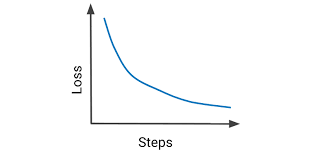

In [115]:
# get the model_0_result keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [116]:
model_0_results['train_loss']

[149.1144399046898,
 1.0881899073719978,
 1.124451369047165,
 1.1085072457790375,
 1.0945058166980743,
 1.0807867869734764,
 1.1381901949644089,
 1.1005047261714935,
 1.0961376130580902,
 1.081112653017044,
 1.1259045004844666,
 1.119418352842331,
 1.0900681018829346,
 1.090803861618042,
 1.0981735363602638,
 1.0947033241391182,
 1.1176571995019913,
 1.1138394325971603,
 1.0965799689292908,
 1.0895055457949638]

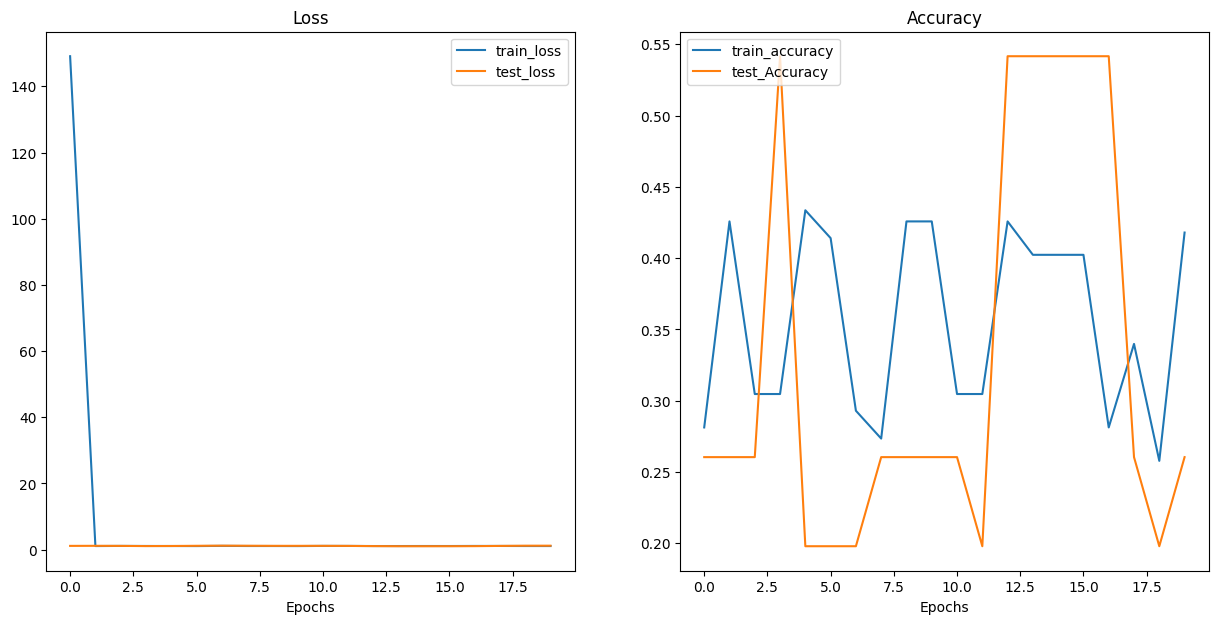

In [118]:
import matplotlib.pyplot as plt
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """plots training curves of a result dictionary."""
    # Get the loss values of the results dictionary(training and test)
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    # Figure out how many epochs here
    epochs = range(len(results["train_loss"]))

    # setup a plot
    plt.figure(figsize=(15, 7))

    # plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    # Show the plots
    plt.show()

# Example usage:
plot_loss_curves(model_0_results)

Pta nhi kya hua mere model ko. It is not training btw, It is prediction randomly. i.e. random_guess

MODEL IS NOT TRAINED AT ALL. PROBEL HAI TRAINING ME.

or may be underfitting. Since loss is not decreasing. It is constant around 1.10

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 24h01m04s].png](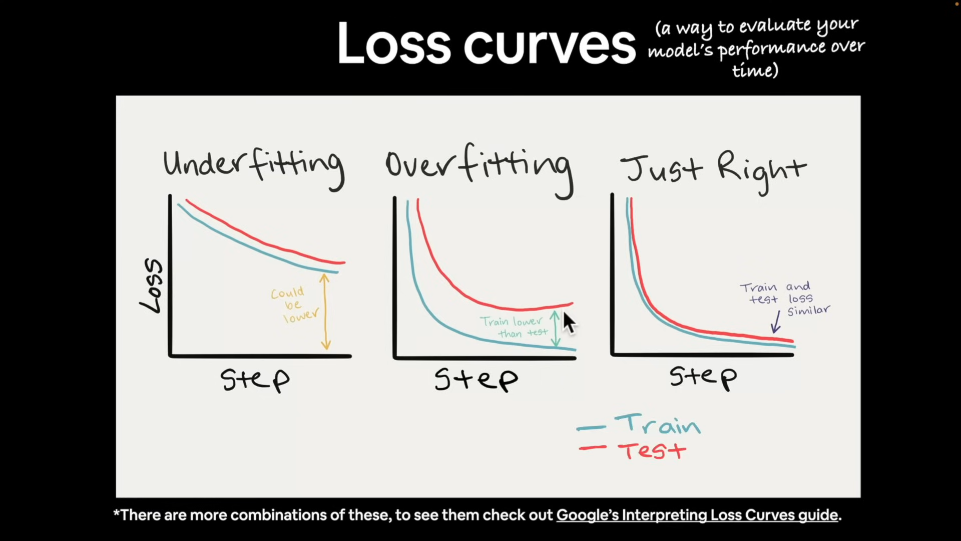)

If there is greater difference between train loss and test loss or train accuracy or test accuracy, model is said to be underfitting.

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 24h04m44s].png](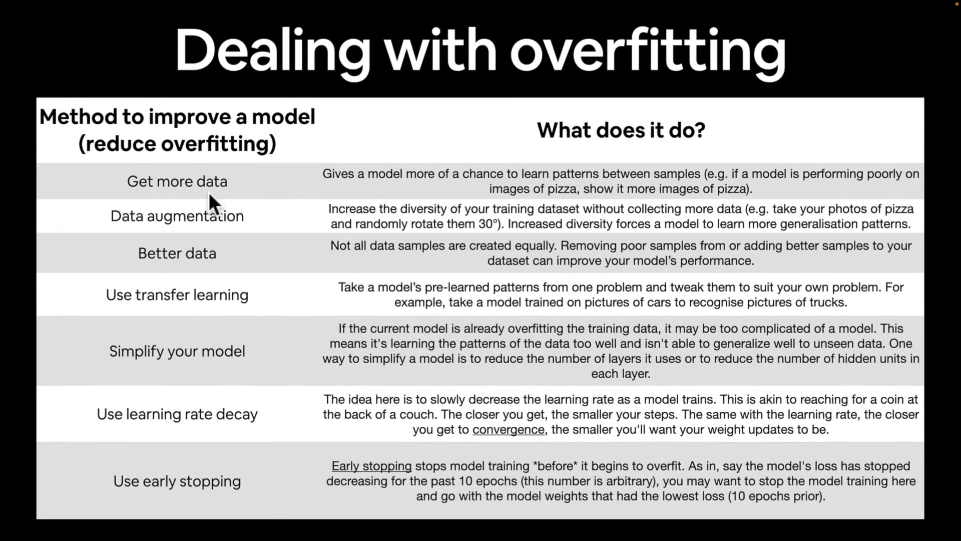)

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 24h10m23s].png](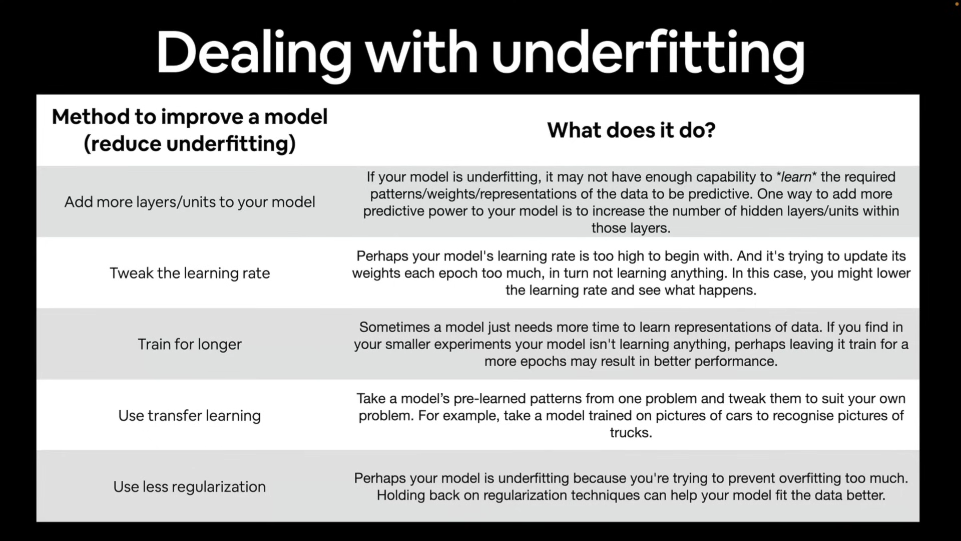)

Ek last bar TINYVGG model ki training. With the hope ki is bar thoda accuracy badhegi. Yhan hm  purane banaye gye tinyvgg model ko apne custom dataset pr use krne ka try krenge.

In [121]:
import torch
from torch import nn

# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  Model from CNN explainer website.
  """
  def __init__(self, input_shape:int, hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # create a conv2d layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # HYPERPARAMETERS : All of them
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) # 2*2 max pool => 60*60 image will become 30*30 image
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    ## So these above convolutional layers with pooling layers are kind of feature extraction layers and trying to learn the patterns that best represent the data.

    # Now classification layers
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0, # there is a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape) # this is the trick to determine the shape, when passing random sample : output [1,10,14,14]
    x = self.conv_block_2(x)
    print(x.shape) # this is the trick to determine the shape, to be passed in the classification layer, when passing random sample. output : [1, 10, 7, 7]
    x = self.classifier(x)
    return x

In [124]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=3,# input_shape = number of color channels.
                              hidden_units = 10,
                              output_shape = len(class_names)
                              )

In [126]:
image_batch.shape

torch.Size([32, 3, 64, 64])

In [127]:
model_2(image_batch)

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2560 and 0x3)

to get input shape in classificaton layer. Now got ki torch.Size([32, 10, 16, 16])

so 10x16x16 krna hai. Remember batch size nhi dalte. Hence whole code in one go:

In [130]:
import torch
from torch import nn

# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  Model from CNN explainer website.
  """
  def __init__(self, input_shape:int, hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # create a conv2d layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # HYPERPARAMETERS : All of them
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) # 2*2 max pool => 60*60 image will become 30*30 image
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    ## So these above convolutional layers with pooling layers are kind of feature extraction layers and trying to learn the patterns that best represent the data.

    # Now classification layers
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16, # there is a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape) # this is the trick to determine the shape, when passing random sample : output [1,10,14,14]
    x = self.conv_block_2(x)
    # print(x.shape) # this is the trick to determine the shape, to be passed in the classification layer, when passing random sample. output : [1, 10, 7, 7]
    x = self.classifier(x)
    return x

In [131]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=3,# input_shape = number of color channels.
                              hidden_units = 10,
                              output_shape = len(class_names)
                              )

In [132]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [134]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device=device):
  """performs a training with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  # put the model into training mode
  model.train()

  # Add a loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    # Put the data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass : output the raw logits from the model
    y_pred = model(X)

    # 2. calculate loss and accuracy per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    # train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # go from logits to prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step (update the model's parameter once per batch)
    optimizer.step()

    # Print out what is happening
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(data_loader.dataset)} samples.") # remember it is not division, it is just string since {} nhi lga variable ke age

  # devide total train loss and accuracy by length of the dataloader(i.e. the number of batches) to get avegage loss and average accuracy per batch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} ")

In [135]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device=device):
  """Perform a testing loop step on the model going over data_loader"""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      # send data to the target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred = model(X_test)

      # 2. calculate the loss/acc
      test_loss += loss_fn(test_pred, y_test)
      # test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # go from logits to prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader) # avg test loss per batch
    test_acc /= len(data_loader) # avg test accuracy per batch
    print(f"Test loss: {test_loss:.5f}")


In [137]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 20
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model = model_2,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
            #  accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            # accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/225 samples.
Train loss: 1.08826 
Test loss: 1.14212
Epoch: 1
------
Looked at 0/225 samples.
Train loss: 1.08694 
Test loss: 1.14481
Epoch: 2
------
Looked at 0/225 samples.
Train loss: 1.08583 
Test loss: 1.14647
Epoch: 3
------
Looked at 0/225 samples.
Train loss: 1.11591 
Test loss: 1.14577
Epoch: 4
------
Looked at 0/225 samples.
Train loss: 1.08717 
Test loss: 1.14838
Epoch: 5
------
Looked at 0/225 samples.
Train loss: 1.10701 
Test loss: 1.15099
Epoch: 6
------
Looked at 0/225 samples.
Train loss: 1.09780 
Test loss: 1.15624
Epoch: 7
------
Looked at 0/225 samples.
Train loss: 1.09494 
Test loss: 1.15484
Epoch: 8
------
Looked at 0/225 samples.
Train loss: 1.11943 
Test loss: 1.11915
Epoch: 9
------
Looked at 0/225 samples.
Train loss: 1.09225 
Test loss: 1.12673
Epoch: 10
------
Looked at 0/225 samples.
Train loss: 1.08839 
Test loss: 1.13309
Epoch: 11
------
Looked at 0/225 samples.
Train loss: 1.11429 
Test loss: 1.10428
Epoch: 12
------
Looked at

Hence old tinyvgg bhi train nhi ho paya, is dataset pr.